In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [4]:
# Loading data
df_heart = pd.read_csv("../project-4-healthcare/datasets/Heart_Disease_Prediction.csv")
df_heart.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [16]:
X = df_heart.copy()
X.drop(["Heart Disease", "index"], axis=1, inplace=True)
X.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


In [17]:
dummy_df = pd.get_dummies(df_heart['Heart Disease'])
y = dummy_df['Presence'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

In [19]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train_scaled, y_train)

In [21]:
predictions = rf_model.predict(X_test_scaled)

In [22]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,34,6
Actual 1,8,20


Accuracy Score : 0.7941176470588235
Classification Report
              precision    recall  f1-score   support

       False       0.81      0.85      0.83        40
        True       0.77      0.71      0.74        28

    accuracy                           0.79        68
   macro avg       0.79      0.78      0.79        68
weighted avg       0.79      0.79      0.79        68



<Axes: title={'center': 'Features Importances'}, ylabel='1'>

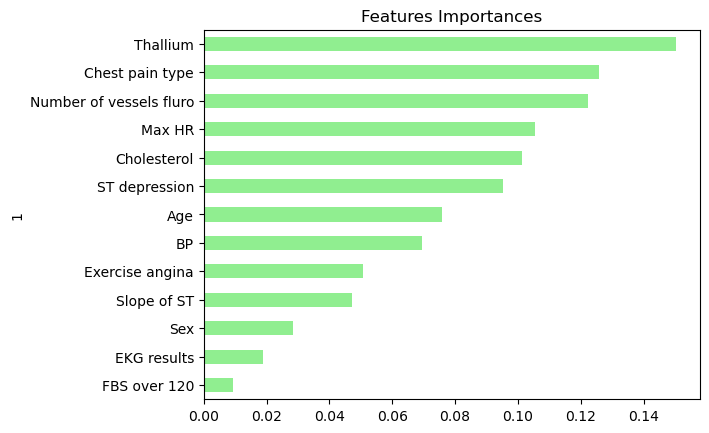

In [23]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [28]:
X2 = df_heart.copy()
X2.drop(["Heart Disease","EKG results", "FBS over 120", 'index'], axis=1, inplace=True)
X2.head()

,Age,Sex,Chest pain type,BP,Cholesterol,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,109,0,2.4,2,3,3
1,67,0,3,115,564,160,0,1.6,2,0,7
2,57,1,2,124,261,141,0,0.3,1,0,7
3,64,1,4,128,263,105,1,0.2,2,1,7
4,74,0,2,120,269,121,1,0.2,1,1,3


In [29]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, random_state=8)
scaler = StandardScaler()
X_scaler2 = scaler.fit(X_train2)
X_train_scaled2 = X_scaler2.transform(X_train2)
X_test_scaled2 = X_scaler2.transform(X_test2)

rf_model2 = rf_model.fit(X_train_scaled2, y_train2)
predictions2 = rf_model2.predict(X_test_scaled2)
# Calculating the confusion matrix
cm2 = confusion_matrix(y_test2, predictions2)
cm_df2 = pd.DataFrame(
    cm2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score2 = accuracy_score(y_test2, predictions2)

print("Confusion Matrix")
display(cm_df2)
print(f"Accuracy Score : {acc_score2}")
print("Classification Report")
print(classification_report(y_test2, predictions2))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,34,6
Actual 1,7,21


Accuracy Score : 0.8088235294117647
Classification Report
              precision    recall  f1-score   support

       False       0.83      0.85      0.84        40
        True       0.78      0.75      0.76        28

    accuracy                           0.81        68
   macro avg       0.80      0.80      0.80        68
weighted avg       0.81      0.81      0.81        68



In [33]:
rf_model3 = RandomForestClassifier(n_estimators=2000, random_state=78)
rf_model3 = rf_model3.fit(X_train_scaled2, y_train2)
predictions3 = rf_model3.predict(X_test_scaled2)
# Calculating the confusion matrix
cm3 = confusion_matrix(y_test2, predictions3)
cm_df3 = pd.DataFrame(
    cm3, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score3 = accuracy_score(y_test2, predictions2)

print("Confusion Matrix")
display(cm_df3)
print(f"Accuracy Score : {acc_score3}")
print("Classification Report")
print(classification_report(y_test2, predictions3))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,34,6
Actual 1,7,21


Accuracy Score : 0.8088235294117647
Classification Report
              precision    recall  f1-score   support

       False       0.83      0.85      0.84        40
        True       0.78      0.75      0.76        28

    accuracy                           0.81        68
   macro avg       0.80      0.80      0.80        68
weighted avg       0.81      0.81      0.81        68



In [35]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(X_train_scaled2, y_train2)
y_pred = modelKNN.predict(X_test_scaled2)

print(classification_report(y_pred,y_test2))

              precision    recall  f1-score   support

       False       0.85      0.89      0.87        38
        True       0.86      0.80      0.83        30

    accuracy                           0.85        68
   macro avg       0.85      0.85      0.85        68
weighted avg       0.85      0.85      0.85        68

